In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
stores = pd.read_csv("../../own_data/all_merged.csv")
stores.set_index(["dataset", "range_index"], inplace=True)

In [4]:
stores_train = stores.loc["train"]

In [5]:
stores_test = stores.loc["test"]


TypeError: Cannot index by location index with a non-integer key

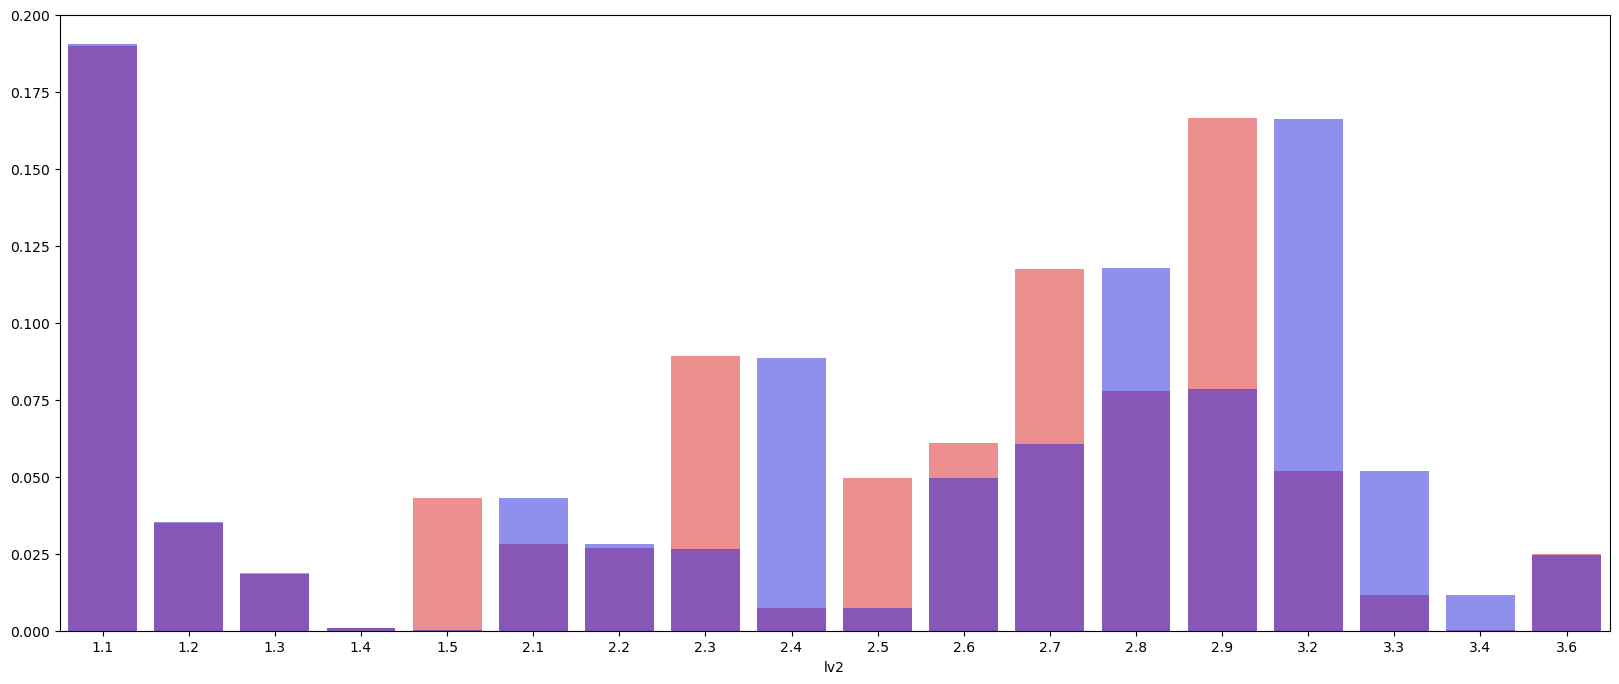

In [6]:
fig, ax = plt.subplots(figsize=(20,8))
tr = stores_train.groupby("lv2")['store_id'].count()/stores_train.shape[0]
ts = stores_test.groupby("lv2")['store_id'].count()/stores_test.shape[0]
ax = sns.barplot(x=tr.index, y=tr.values, ax=ax, color="red", alpha=0.5)
ax = sns.barplot(x=ts.index, y=ts.values, ax=ax, color="blue", alpha=0.5)
print(ts.iloc["1.4"])
fig.show()

In [86]:
print(stores_train.groupby("lv2")['store_id'].count()/stores_train.shape[0])
print(stores_test.groupby("lv2")['store_id'].count()/stores_test.shape[0])
print(stores_train[stores_train["age_0"].notna()].groupby("lv2")['store_id'].count()/stores_train[stores_train["age_0"].notna()].notna().shape[0])


lv2
1.1    0.190038
1.2    0.035077
1.3    0.018630
1.4    0.001013
2.1    0.043028
2.2    0.028217
2.3    0.026736
2.4    0.089095
2.5    0.007405
2.6    0.049575
2.7    0.060878
2.8    0.117312
2.9    0.077948
3.2    0.166576
3.3    0.051914
3.4    0.011692
3.5    0.000078
3.6    0.024788
Name: store_id, dtype: float64
lv2
1.1    0.190510
1.2    0.035444
1.3    0.018538
1.4    0.000933
1.5    0.000117
2.1    0.043022
2.2    0.028215
2.3    0.026583
2.4    0.088609
2.5    0.007229
2.6    0.049551
2.7    0.060744
2.8    0.117873
2.9    0.078349
3.2    0.166142
3.3    0.052000
3.4    0.011542
3.6    0.024601
Name: store_id, dtype: float64
lv2
1.1    0.186743
1.2    0.034926
1.3    0.018251
1.4    0.000913
2.1    0.042144
2.2    0.029119
2.3    0.026298
2.4    0.089099
2.5    0.007383
2.6    0.048946
2.7    0.060810
2.8    0.118799
2.9    0.077651
3.2    0.170400
3.3    0.052763
3.4    0.011531
3.5    0.000083
3.6    0.024141
Name: store_id, dtype: float64


C:\Users\haako\AppData\Local\Temp\ipykernel_10532\2067386446.py:18: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


Float64Index([1.1, 1.2, 1.3, 1.4, 2.1, 2.2, 2.3, 2.4, 2.5, 2.6, 2.7, 2.8, 2.9,
              3.2, 3.3, 3.4, 3.6],
             dtype='float64', name='lv2')


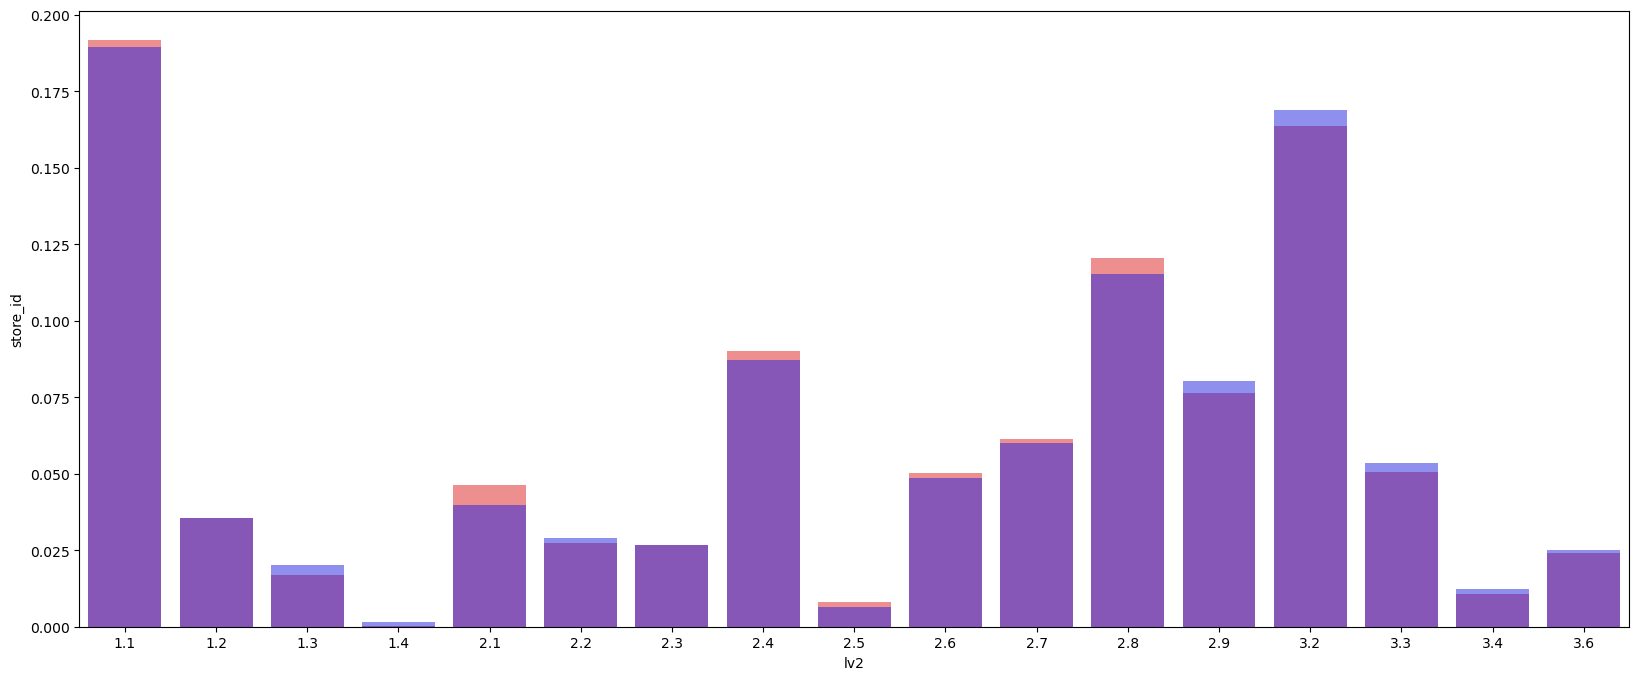

In [12]:
from sklearn.model_selection import train_test_split


# tr = stores_train.groupby("lv2")['store_id'].count()/stores_train.shape[0]
ts = stores_test.groupby("lv2")['store_id'].count()/stores_test.shape[0]

ts, ts_2 = train_test_split(stores_test, test_size=0.5)
ts = ts.groupby("lv2")['store_id'].count()/ts.shape[0]
tr = ts_2.groupby("lv2")['store_id'].count()/ts_2.shape[0]

# ts = stores_train[stores_train["age_0"].notna()].groupby("lv2")['store_id'].count()/stores_train[stores_train["age_0"].notna()].notna().shape[0]
ts = pd.DataFrame(ts)
tr = pd.DataFrame(tr)
rows = ts.index.intersection(tr.index)
fig, ax = plt.subplots(figsize=(20,8))
ax = sns.barplot(x=ts.loc[rows].index, y=ts.loc[rows].store_id, ax=ax, color="red", alpha=0.5)
ax = sns.barplot(x=tr.loc[rows].index, y=tr.loc[rows].store_id, color="blue", alpha=0.5)
fig.show()
print(ts.loc[rows].index)